# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "q=philadelphia")

In [ ]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url)

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | teya
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | clyde river
Processing Record 4 of Set 1 | bajil
Processing Record 5 of Set 1 | uvinza
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | zhezkazgan
Processing Record 8 of Set 1 | hambantota
Processing Record 9 of Set 1 | poptun
Processing Record 10 of Set 1 | thornbury
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | broken hill
Processing Record 17 of Set 1 | husavik
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | gornopravdinsk
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | salo
Processing Record 23 of Set 1 | cape tow

Processing Record 38 of Set 4 | male
Processing Record 39 of Set 4 | labutta
City not found. Skipping...
Processing Record 40 of Set 4 | djenne
Processing Record 41 of Set 4 | kaitangata
Processing Record 42 of Set 4 | eskisehir
Processing Record 43 of Set 4 | pong
Processing Record 44 of Set 4 | pocao de pedras
Processing Record 45 of Set 4 | katobu
Processing Record 46 of Set 4 | sosnovka
Processing Record 47 of Set 4 | santa clara
Processing Record 48 of Set 4 | berlevag
Processing Record 49 of Set 4 | beatrice
Processing Record 0 of Set 5 | gangotri
City not found. Skipping...
Processing Record 1 of Set 5 | tukrah
Processing Record 2 of Set 5 | pechenga
Processing Record 3 of Set 5 | baykit
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | sulangan
Processing Record 6 of Set 5 | beira
Processing Record 7 of Set 5 | seminole
Processing Record 8 of Set 5 | mizdah
Processing Record 9 of Set 5 | bulancak
Processing Record 10 of Set 5 | clyde
Processing Record 11 

City not found. Skipping...
Processing Record 26 of Set 8 | amazar
Processing Record 27 of Set 8 | azanka
Processing Record 28 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 29 of Set 8 | mackay
Processing Record 30 of Set 8 | tigil
Processing Record 31 of Set 8 | mukhen
Processing Record 32 of Set 8 | cururupu
Processing Record 33 of Set 8 | roald
Processing Record 34 of Set 8 | tessalit
Processing Record 35 of Set 8 | porbandar
Processing Record 36 of Set 8 | carauari
Processing Record 37 of Set 8 | grants pass
Processing Record 38 of Set 8 | college
Processing Record 39 of Set 8 | manaure
Processing Record 40 of Set 8 | starosubkhangulovo
Processing Record 41 of Set 8 | los llanos de aridane
Processing Record 42 of Set 8 | nuuk
Processing Record 43 of Set 8 | haradok
Processing Record 44 of Set 8 | matagami
Processing Record 45 of Set 8 | tandil
Processing Record 46 of Set 8 | olafsvik
Processing Record 47 of Set 8 | lachhmangarh
Processing Record 48 of Set 8 | 

Processing Record 16 of Set 12 | namatanai
Processing Record 17 of Set 12 | gallup
Processing Record 18 of Set 12 | muroto
Processing Record 19 of Set 12 | liuli
Processing Record 20 of Set 12 | canhotinho
Processing Record 21 of Set 12 | lingao
Processing Record 22 of Set 12 | bantry
Processing Record 23 of Set 12 | nishihara
Processing Record 24 of Set 12 | hualmay
Processing Record 25 of Set 12 | champerico
Processing Record 26 of Set 12 | neyyattinkara
Processing Record 27 of Set 12 | sorland
Processing Record 28 of Set 12 | bay roberts
Processing Record 29 of Set 12 | westport
Processing Record 30 of Set 12 | chipinge
Processing Record 31 of Set 12 | canaries
Processing Record 32 of Set 12 | matay
Processing Record 33 of Set 12 | quebo
Processing Record 34 of Set 12 | mayo
Processing Record 35 of Set 12 | tuy hoa
Processing Record 36 of Set 12 | coahuayana
Processing Record 37 of Set 12 | road town
Processing Record 38 of Set 12 | shelburne
Processing Record 39 of Set 12 | saint a

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,teya,60.3778,92.6267,11.52,60,11,1.82,RU,1685372617
1,vaini,-21.2000,-175.2000,25.09,88,20,4.63,TO,1685372617
2,clyde river,70.4692,-68.5914,-2.87,93,100,3.09,CA,1685372617
3,bajil,15.0584,43.2851,31.43,47,100,5.09,YE,1685372619
4,uvinza,-5.1036,30.3911,24.06,63,98,1.47,TZ,1685372619


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,teya,60.3778,92.6267,11.52,60,11,1.82,RU,1685372617
1,vaini,-21.2000,-175.2000,25.09,88,20,4.63,TO,1685372617
2,clyde river,70.4692,-68.5914,-2.87,93,100,3.09,CA,1685372617
3,bajil,15.0584,43.2851,31.43,47,100,5.09,YE,1685372619
4,uvinza,-5.1036,30.3911,24.06,63,98,1.47,TZ,1685372619


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

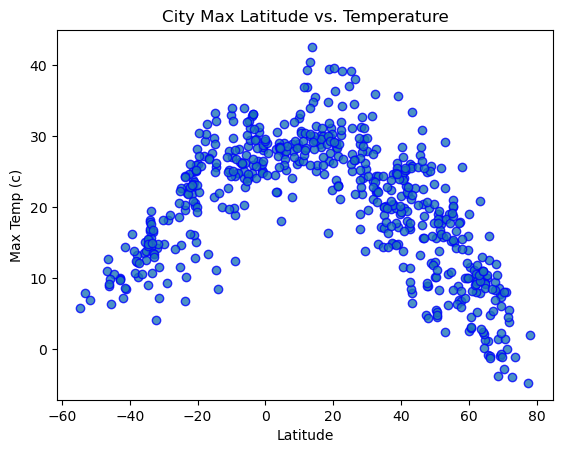

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="blue",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

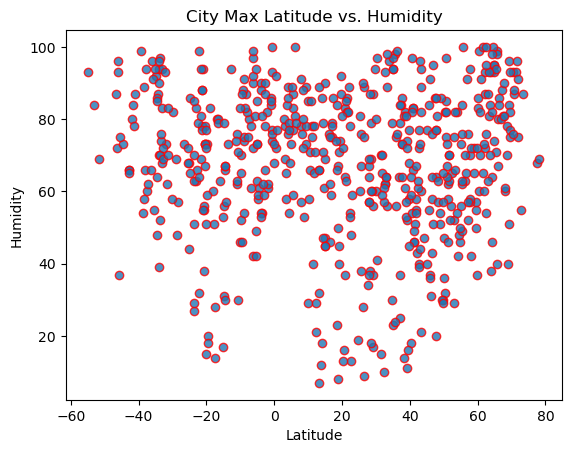

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

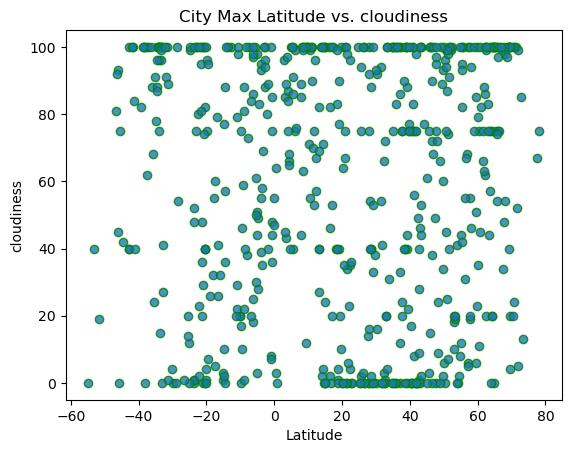

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. cloudiness")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

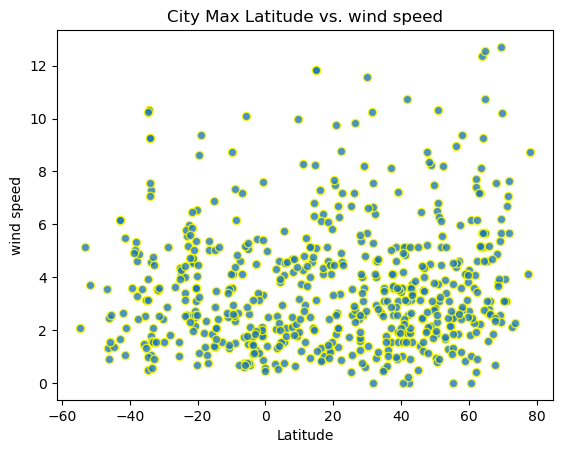

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="yellow",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. wind speed")
plt.xlabel("Latitude")
plt.ylabel("wind speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, Y_value, text_coord):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept)}"
    
    plt.scatter(x_value, y_value)
    ply.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsixe=15, color="blue")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"the r-value is {rvalue ** 2}")
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,teya,60.3778,92.6267,11.52,60,11,1.82,RU,1685372617
2,clyde river,70.4692,-68.5914,-2.87,93,100,3.09,CA,1685372617
3,bajil,15.0584,43.2851,31.43,47,100,5.09,YE,1685372619
6,zhezkazgan,47.8043,67.7144,24.99,20,0,2.00,KZ,1685372620
7,hambantota,6.1241,81.1185,25.19,100,75,2.06,LK,1685372621


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vaini,-21.2000,-175.2000,25.09,88,20,4.63,TO,1685372617
4,uvinza,-5.1036,30.3911,24.06,63,98,1.47,TZ,1685372619
5,rikitea,-23.1203,-134.9692,22.82,63,100,5.57,PF,1685372620
10,port lincoln,-34.7333,135.8667,15.02,92,78,3.94,AU,1685372623
12,saint-philippe,-21.3585,55.7679,23.77,78,48,4.54,RE,1685372524


###  Temperature vs. Latitude Linear Regression Plot

In [15]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_value, y_value, title, text_coord):
    # Rest of the code remains the same
    # ...

    X_values = northern_hemi_df["Lat"]
    y_values = northern_hemi_df["Max Temp"]
    plot_linear_regression(X_values, y_values, "Max Temp", (6, -10))
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-", label="Regression Line")
    plt.annotate(line_eq, text_coord, fontsize=15, color="blue")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"the r-value is {rvalue ** 2}")
    plt.legend()
    plt.show()
    


In [16]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_value, y_value, title, text_coord):
    X_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Max Temp"]
    plot_linear_regression(X_values, y_values, "Max Temp", (-55, 5))
    

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [1]:
# Northern Hemisphere
X_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["humidity"]
plot_linear_regression(X_values, y_values, "Humidity", (6, -10))
    
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-", label="Regression Line")
plt.annotate(line_eq, text_coord, fontsize=15, color="blue")
plt.xlabel("Lat")
plt.ylabel(title)
print(f"the r-value is {rvalue ** 2}")
plt.legend()
plt.show()

NameError: name 'northern_hemi_df' is not defined

In [18]:
# Southern Hemisphere
def plot_linear_regression(x_value, y_value, title, text_coord):
    X_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Humidity"]
    plot_linear_regression(X_values, y_values, "Humidity", (-55, 5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
X_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(X_values, y_values, "Cloudiness", (6, -10))
    
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-", label="Regression Line")
plt.annotate(line_eq, text_coord, fontsize=15, color="blue")
plt.xlabel("Lat")
plt.ylabel(title)
print(f"the r-value is {rvalue ** 2}")
plt.legend()
plt.show()

In [ ]:
# Southern Hemisphere
def plot_linear_regression(x_value, y_value, title, text_coord):
    X_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Cloudiness"]
    plot_linear_regression(X_values, y_values, "Cloudiness", (-55, 5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
X_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(X_values, y_values, "Wind Speed", (6, -10))
    
plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-", label="Regression Line")
plt.annotate(line_eq, text_coord, fontsize=15, color="blue")
plt.xlabel("Lat")
plt.ylabel(title)
print(f"the r-value is {rvalue ** 2}")
plt.legend()
plt.show()

In [ ]:
# Southern Hemisphere
def plot_linear_regression(x_value, y_value, title, text_coord):
    X_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Wind Speed"]
    plot_linear_regression(X_values, y_values, "Wind Speed", (-55, 5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE